# An optimization problem using the Rosenbrock function

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

## Rosenbrock function

In [2]:
def rosenbrock(x,y):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = x
    p2 = y
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [3]:
def rosenbrock_grad(x,y):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    p1 = x
    p2 = y
    J1 = -400.*p1*(p2-p1**2) - 2.*(1.- p1)
    J2 = 200.*(p2-p1**2)
    J = np.array([J1,J2])
    return J

## $p^T p$ function

In [4]:
def ptp(x,y):
    '''
    Calculate the ptp function.   
    
    '''
    p1 = x
    p2 = y
    z = p1**2 + p2**2
    return z

In [5]:
def ptp_grad(x,y):
    '''
    Calculate the gradient of ptp function.
    '''
    p1 = x
    p2 = y
    J1 = 2.*p1
    J2 = 2.*p2
    J = np.array([J1,J2])
    return J

## Parameters for calculating the rosenbrock function 

In [6]:
Nx = 20
Ny = 20

In [7]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [8]:
Z = rosenbrock(X,Y) 

In [9]:
Z_ros = histeq(Z).reshape(Nx,Ny)

## Parameters for calculating the rosenbrock function 

In [10]:
Nx = 20
Ny = 20

In [11]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [12]:
Z = ptp(X,Y) 

In [13]:
Z_ptp = histeq(Z).reshape(Nx,Ny)

## Visuatization of the functions 


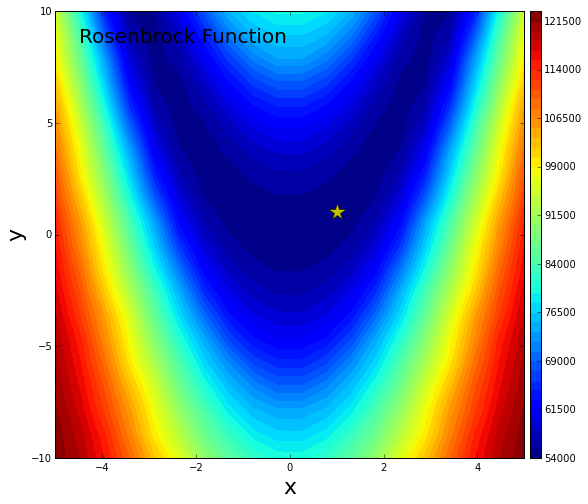

In [14]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1., 'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


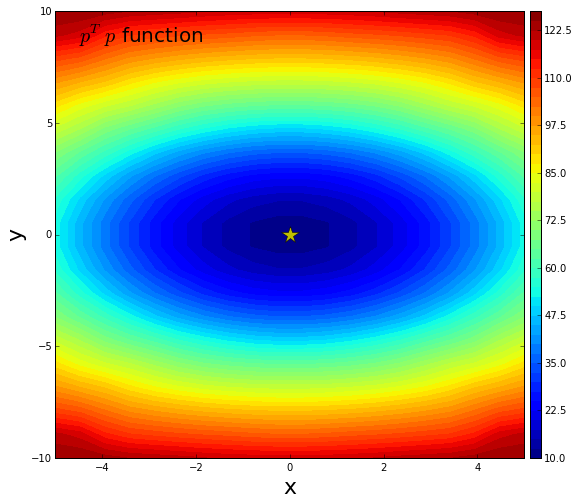

In [15]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ptp, 50)
plt.plot(0.,0., 'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('$p^T p$ function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Steepest Descent without backtracking

### Rosenbrock function

In [16]:
itmax = 5000

px_ros = []
py_ros = []

px0_ros = -1.
py0_ros = 5.

px_ros.append(px0_ros)
py_ros.append(py0_ros)

phi_ros = []
it_ros = []
for i in range(itmax):
    lamb = 0.001
    
    dx = rosenbrock_grad(px_ros[i],py_ros[i])[0]
    dy = rosenbrock_grad(px_ros[i],py_ros[i])[1]
    
    f_pi = rosenbrock(px_ros[i],py_ros[i])
    
    px_ros.append(px_ros[i] - lamb*dx)
    py_ros.append(py_ros[i] - lamb*dy)
    
    f_plus = rosenbrock(px_ros[i+1],py_ros[i+1])
    
    phi_ros.append(f_plus)
    it_ros.append(i)
    
    #print 'iteration:', i
    #print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    #print 'Rosenbrock value:', f_pi


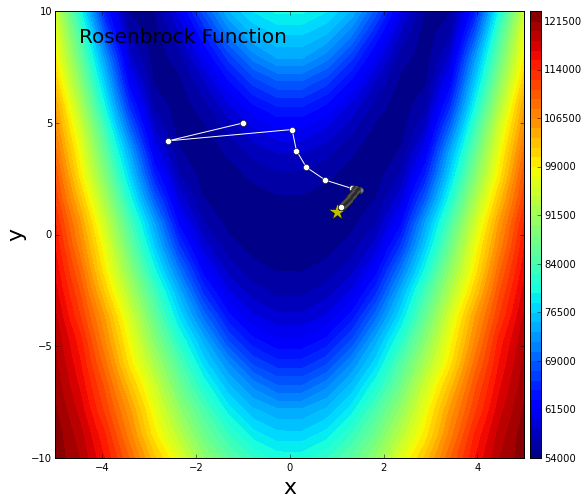

In [17]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1., 'y*',markersize=18)
plt.plot(px_ros,py_ros,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

### $p^T p$ function

In [18]:
itmax = 50000

px_ptp = []
py_ptp = []

px0_ptp = -1.
py0_ptp = 7.

px_ptp.append(px0_ptp)
py_ptp.append(py0_ptp)

phi_ptp = []
it_ptp = []
for i in range(itmax):
    lamb = 0.0001
    
    dx = ptp_grad(px_ptp[i],py_ptp[i])[0]
    dy = ptp_grad(px_ptp[i],py_ptp[i])[1]
    
    f_pi = ptp(px_ptp[i],py_ptp[i])
    
    px_ptp.append(px_ptp[i] - lamb*dx)
    py_ptp.append(py_ptp[i] - lamb*dy)
    
    f_plus = ptp(px_ptp[i+1],py_ptp[i+1])
    
    phi_ptp.append(f_plus)
    it_ptp.append(i)
    
    #print 'iteration:', i
    #print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    #print 'Rosenbrock value:', f_pi


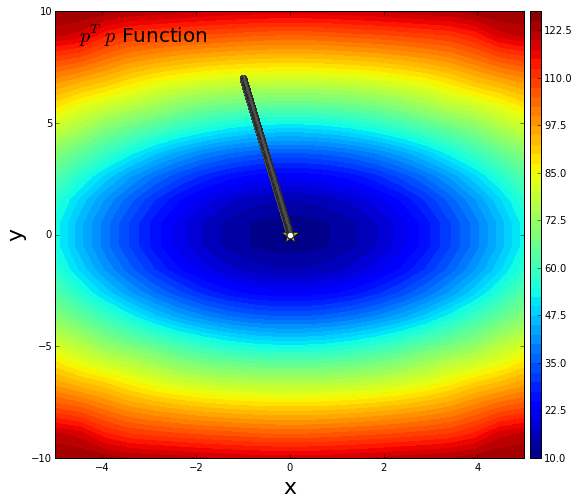

In [19]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ptp, 50)
plt.plot(0.,0., 'y*',markersize=18)
plt.plot(px_ptp,py_ptp,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('$p^T p$ Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Calculating the Steepest Descent with Armijo condition

### Rosenbrock function

In [20]:
alpha = 1e-4
beta =  0.4
itmax = 50000

px_ros_armi = []
py_ros_armi = []

px0_ros_armi = -1.
py0_ros_armi = 7.

px_ros_armi.append(px0_ros_armi)
py_ros_armi.append(py0_ros_armi)

phi_ros_armi = []
it_ros_armi = []
for i in range(itmax):
    m = 0
    lamb = 1.
    
    dx = rosenbrock_grad(px_ros_armi[i],py_ros_armi[i])[0]
    dy = rosenbrock_grad(px_ros_armi[i],py_ros_armi[i])[1]
    
    mod = dx**2 + dy**2
    
    px_ros_armi.append(px_ros_armi[i] - lamb*dx)
    py_ros_armi.append(py_ros_armi[i] - lamb*dy)
    
    f_pi = rosenbrock(px_ros_armi[i],py_ros_armi[i])
    
    f_plus = rosenbrock(px_ros_armi[i+1],py_ros_armi[i+1])
    
    phi_ros_armi.append(f_plus)
    it_ros_armi.append(i)
    
    #print 'iteration:', i
    #print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    #print 'Rosenbrock value:', f_pi
    
    while ((f_plus - f_pi) > (alpha*lamb*mod)):
        m += 1
        lamb = beta**m
        
        px_ros_armi[i+1] = px_ros_armi[i] - lamb*dx
        py_ros_armi[i+1] = py_ros_armi[i] - lamb*dy
        
        f_plus = rosenbrock(px_ros_armi[i+1],py_ros_armi[i+1])      

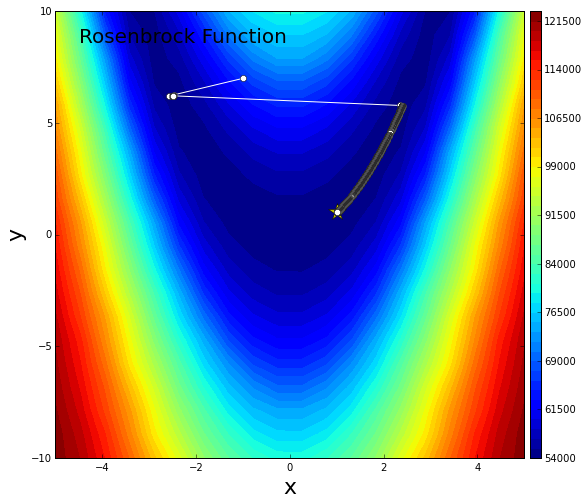

In [21]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1., 'y*',markersize=18)
plt.plot(px_ros_armi,py_ros_armi,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

### $p^T p$ function

In [22]:
alpha = 1e-4
beta =  0.4
itmax = 100

px_ptp_armi = []
py_ptp_armi = []

px0_ptp_armi = -1.
py0_ptp_armi = 7.

px_ptp_armi.append(px0_ptp_armi)
py_ptp_armi.append(py0_ptp_armi)

phi_ptp_armi = []
it_ptp_armi = []
for i in range(itmax):
    m = 0
    lamb = .5
    
    dx = ptp_grad(px_ptp_armi[i],py_ptp_armi[i])[0]
    dy = ptp_grad(px_ptp_armi[i],py_ptp_armi[i])[1]
    
    mod = dx**2 + dy**2
    
    px_ptp_armi.append(px_ptp_armi[i] - lamb*dx)
    py_ptp_armi.append(py_ptp_armi[i] - lamb*dy)
    
    f_pi = ptp(px_ptp_armi[i],py_ptp_armi[i])
    
    f_plus = ptp(px_ptp_armi[i+1],py_ptp_armi[i+1])
    
    phi_ptp_armi.append(f_plus)
    it_ptp_armi.append(i)
    
    print 'iteration:', i
    print 'p1 = %.2f | p2 = %.2f' % (px_ptp_armi[i],py_ptp_armi[i])
    print 'Rosenbrock value:', f_pi
    
    while ((f_plus - f_pi) > (alpha*lamb*mod)):
        m += 1
        lamb = beta**m
        
        px_ptp_armi[i+1] = px_ptp_armi[i] - lamb*dx
        py_ptp_armi[i+1] = py_ptp_armi[i] - lamb*dy
        
        f_plus = ptp(px_ptp_armi[i+1],py_ptp_armi[i+1])    

iteration: 0
p1 = -1.00 | p2 = 7.00
Rosenbrock value: 50.0
iteration: 1
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 2
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 3
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 4
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 5
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 6
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 7
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 8
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 9
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 10
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 11
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 12
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 13
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 14
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 15
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 16
p1 = 0.00 | p2 = 0.00
Rosenbrock value: 0.0
iteration: 17
p1 = 0.0

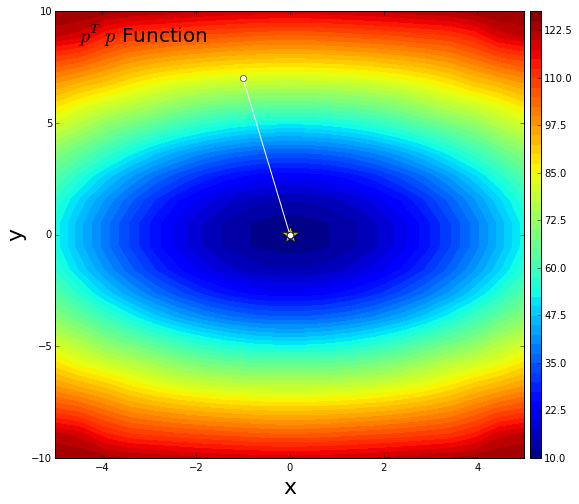

In [23]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ptp, 50)
plt.plot(0.,0., 'y*',markersize=18)
plt.plot(px_ptp_armi,py_ptp_armi,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('$p^T p$ Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Comparison between these two tests

### Rosenbrock Function

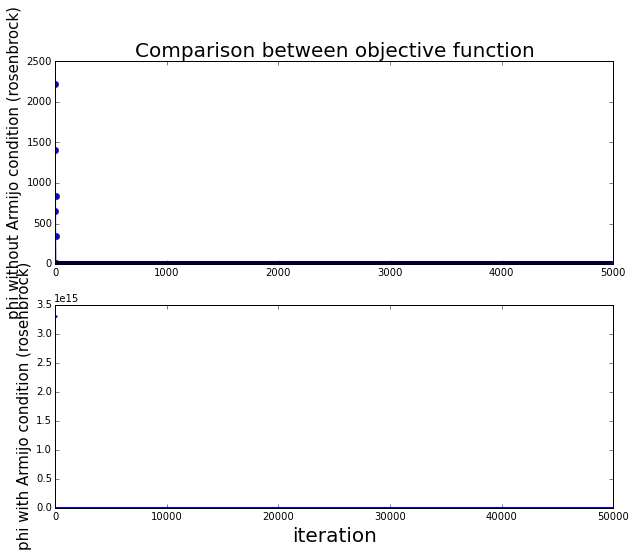

In [24]:
plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
plt.plot(it_ros, phi_ros, 'o-')
plt.title('Comparison between objective function',fontsize=20)
plt.ylabel('phi without Armijo condition (rosenbrock)',fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(it_ros_armi, phi_ros_armi, '.-')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('phi with Armijo condition (rosenbrock)',fontsize=15)

plt.show()


### $p^T p$ Function

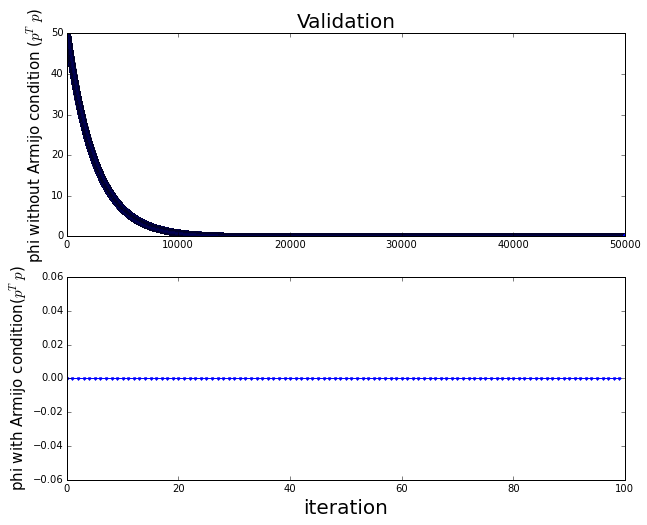

In [25]:
plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
plt.plot(it_ptp, phi_ptp, 'o-')
plt.title('Validation',fontsize=20)
plt.ylabel('phi without Armijo condition ($p^T p$)',fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(it_ptp_armi, phi_ptp_armi, '.-')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('phi with Armijo condition($p^T p$)',fontsize=15)

plt.show()
